# Задание 2.0

## Подключаем нужные библиотеки

In [41]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_halving_search_cv
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

## Загружаем Dataset

In [42]:
df = pd.read_csv("d:/loan_train.csv")
df = df.dropna()
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [43]:
le = LabelEncoder()
df_encode= df.copy()
for i, f in enumerate(df.select_dtypes(include="object")):
    le.fit(df_encode[f])  
    df_encode[f] = le.fit_transform(df_encode[f])
df_encode.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1


In [44]:
X, y = df_encode.drop(columns='Status'), df_encode["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)

<Axes: ylabel='Density'>

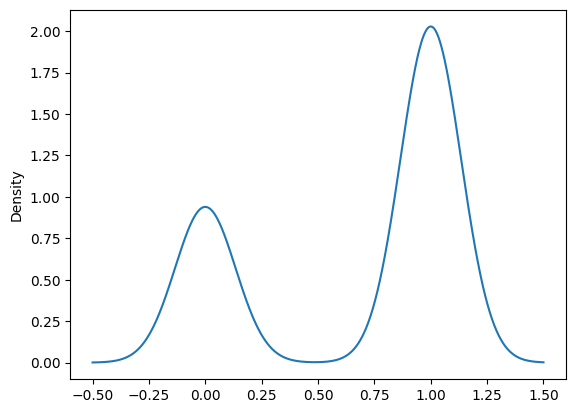

In [45]:
y.plot(kind='kde')

              precision    recall  f1-score   support

           0       0.92      0.29      0.44        38
           1       0.76      0.99      0.86        87

    accuracy                           0.78       125
   macro avg       0.84      0.64      0.65       125
weighted avg       0.81      0.78      0.73       125



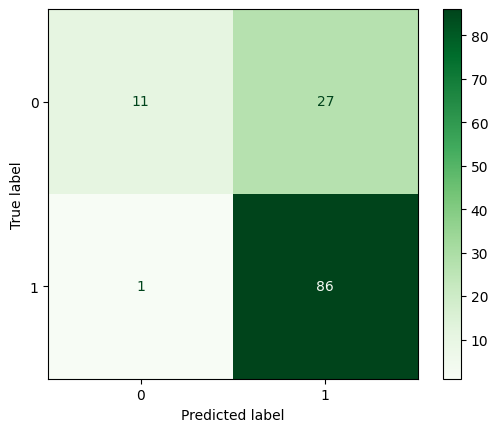

In [46]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_preds_lg = lg.predict(X_test)
print(classification_report(y_test, y_preds_lg))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_lg)).plot(cmap='Greens')

In [47]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression())
    ]
)

In [48]:
model = pipeline.fit(X_train, y_train)
y_pred_simple = model.predict(X_test)
print(classification_report(y_test, y_pred_simple))

              precision    recall  f1-score   support

           0       1.00      0.32      0.48        38
           1       0.77      1.00      0.87        87

    accuracy                           0.79       125
   macro avg       0.88      0.66      0.68       125
weighted avg       0.84      0.79      0.75       125



In [49]:
parameters = {
    'scaler__with_mean': [True, False],
    'clf__C': np.linspace(0.01, 1, 10),
    'clf__penalty': ['l2', 'none'],
    'clf__random_state': [2023],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    n_jobs=5,
    verbose=10,
)

In [50]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             n_jobs=5,
             param_grid={'clf__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'clf__penalty': ['l2', 'none'],
                         'clf__random_state': [2023],
                         'scaler__with_mean': [True, False]},
             verbose=10)

In [51]:
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

clf__C: 0.12
clf__penalty: l2
clf__random_state: 2023
scaler__with_mean: True


In [52]:
y_pred_optimized = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       1.00      0.32      0.48        38
           1       0.77      1.00      0.87        87

    accuracy                           0.79       125
   macro avg       0.88      0.66      0.68       125
weighted avg       0.84      0.79      0.75       125



In [53]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameters,
    n_iter=30,
    random_state=2023,
    n_jobs=5,
    verbose=1,
)

In [54]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf', LogisticRegression())]),
                   n_iter=30, n_jobs=5,
                   param_distributions={'clf__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'clf__penalty': ['l2', 'none'],
                                        'clf__random_state': [2023],
                                        'scaler__with_mean': [True, False]},
                   random_state=2023, verbose=1)

In [55]:
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

clf__C: 0.12
clf__penalty: l2
clf__random_state: 2023
scaler__with_mean: True


In [56]:
y_pred_optimized = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       1.00      0.32      0.48        38
           1       0.77      1.00      0.87        87

    accuracy                           0.79       125
   macro avg       0.88      0.66      0.68       125
weighted avg       0.84      0.79      0.75       125



In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.21      0.24        38
           1       0.68      0.75      0.71        87

    accuracy                           0.58       125
   macro avg       0.48      0.48      0.47       125
weighted avg       0.56      0.58      0.57       125



In [93]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ('knc', KNeighborsClassifier())
    ]
)

parameters = {
    'scaler__with_mean': [True, False],
    'knc__weights': ['uniform', 'distance'],
    'knc__leaf_size': np.arange(1,100,1),
    'knc__n_neighbors': np.arange(1,10,1),
}

In [94]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    n_jobs=5,
    verbose=10,
)

In [95]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3564 candidates, totalling 17820 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knc', KNeighborsClassifier())]),
             n_jobs=5,
             param_grid={'knc__leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'knc__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'knc__weights': ['uniform', 'distance'],
                         'scaler__with_mean': [True, False]},
             verbose=10)

In [96]:
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

knc__leaf_size: 1
knc__n_neighbors: 9
knc__weights: uniform
scaler__with_mean: True


In [97]:
y_pred_optimized = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.79      0.29      0.42        38
           1       0.76      0.97      0.85        87

    accuracy                           0.76       125
   macro avg       0.77      0.63      0.64       125
weighted avg       0.77      0.76      0.72       125



In [63]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameters,
    n_iter=30,
    random_state=2023,
    n_jobs=5,
    verbose=1,
)

In [64]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('knc', KNeighborsClassifier())]),
                   n_iter=30, n_jobs=5,
                   param_distributions={'knc__leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'knc__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'knc__weights': ['uniform', 'distance'],
                                        'scaler__with_mean': [True, False]},
                   random_state=2023, verbose=1)

In [65]:
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

knc__leaf_size: 10
knc__n_neighbors: 9
knc__weights: uniform
scaler__with_mean: False


In [74]:
y_pred_optimized = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.79      0.29      0.42        38
           1       0.76      0.97      0.85        87

    accuracy                           0.76       125
   macro avg       0.77      0.63      0.64       125
weighted avg       0.77      0.76      0.72       125



In [67]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred= rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.32      0.45        38
           1       0.76      0.97      0.85        87

    accuracy                           0.77       125
   macro avg       0.78      0.64      0.65       125
weighted avg       0.77      0.77      0.73       125



In [79]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ('rfc', RandomForestClassifier())
    ]
)

parameters = {
    'scaler__with_mean': [True, False],
    'rfc__n_estimators': np.arange(50,150,5),
    'rfc__criterion': ['gini', 'entropy', 'log_loss'],
    'rfc__class_weight': ['balanced', 'balanced_subsample', None]
}

In [80]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    n_jobs=5,
    verbose=1,
)

In [81]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=5,
             param_grid={'rfc__class_weight': ['balanced', 'balanced_subsample',
                                               None],
                         'rfc__criterion': ['gini', 'entropy', 'log_loss'],
                         'rfc__n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145]),
                         'scaler__with_mean': [True, False]},
             verbose=1)

In [82]:
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

rfc__class_weight: balanced
rfc__criterion: gini
rfc__n_estimators: 85
scaler__with_mean: True


In [83]:
y_pred_optimized = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.65      0.29      0.40        38
           1       0.75      0.93      0.83        87

    accuracy                           0.74       125
   macro avg       0.70      0.61      0.62       125
weighted avg       0.72      0.74      0.70       125



In [84]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameters,
    n_iter=30,
    random_state=2023,
    n_jobs=5,
    verbose=1,
)

In [85]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_iter=30, n_jobs=5,
                   param_distributions={'rfc__class_weight': ['balanced',
                                                              'balanced_subsample',
                                                              None],
                                        'rfc__criterion': ['gini', 'entropy',
                                                           'log_loss'],
                                        'rfc__n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145]),
                                        'scaler__with_mean': [True, False]},
                   random_state=2023, verbose=1)

In [86]:
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

rfc__class_weight: None
rfc__criterion: gini
rfc__n_estimators: 115
scaler__with_mean: False


In [87]:
y_pred_optimized = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.86      0.32      0.46        38
           1       0.77      0.98      0.86        87

    accuracy                           0.78       125
   macro avg       0.81      0.65      0.66       125
weighted avg       0.79      0.78      0.74       125



In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

In [100]:
import optuna

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [101]:
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        classifier_obj = SVC(C=svc_c, gamma="auto")
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)

    score = cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [102]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000)

[I 2024-02-29 18:59:47,607] A new study created in memory with name: no-name-eb667462-cbf9-4c41-8826-7111947a7d4b
[I 2024-02-29 18:59:49,344] Trial 0 finished with value: 0.7755693432412284 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 5}. Best is trial 0 with value: 0.7755693432412284.
[I 2024-02-29 18:59:50,264] Trial 1 finished with value: 0.6833682033523315 and parameters: {'classifier': 'SVC', 'svc_c': 3.3137833821034515e-09}. Best is trial 0 with value: 0.7755693432412284.
[I 2024-02-29 18:59:51,295] Trial 2 finished with value: 0.7896135439963446 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 5}. Best is trial 2 with value: 0.7896135439963446.
[I 2024-02-29 18:59:52,353] Trial 3 finished with value: 0.7975975759324724 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2}. Best is trial 3 with value: 0.7975975759324724.
[I 2024-02-29 18:59:53,211] Trial 4 finished with value: 0.6873842676093597 and parameters: {'classifier': 'SVC', 'sv

In [ ]:
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       1.00      0.32      0.48        38
           1       0.77      1.00      0.87        87

    accuracy                           0.79       125
   macro avg       0.88      0.66      0.68       125
weighted avg       0.84      0.79      0.75       125



In [14]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

NameError: name 'study' is not defined